<a href="https://colab.research.google.com/github/Meghashyamt/Mobile-Price-Prediction/blob/master/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Prediction


**AIM:**
In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile

In this data:

**id**:ID

**battery_power**:Total energy a battery can store in one time measured in mAh

**blue**:Has bluetooth or not

**clock_speed**:speed at which microprocessor executes instructions

**dual_sim**:Has dual sim support or not

**fc**:Front Camera mega pixels

**four_g**:Has 4G or not

**int_memory**:Internal Memory in Gigabytes

**m_dep**:Mobile Depth in cm

**mobile_wt**:Weight of mobile phone

**n_cores**:Number of cores of processor

**pc**:Primary Camera mega pixels

**px_height**:Pixel Resolution Height

**px_width**:Pixel Resolution Width

**ram**:Random Access Memory in Megabytes

**sc_h**:Screen Height of mobile in cm

**sc_w**:Screen Width of mobile in cm

**talk_time**:longest time that a single battery charge will last when you are

**three_g**:Has 3G or not

**touch_screen**:Has touch screen or not

**wifi**:Has wifi or not

**USE:**

This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

**Applied Models:**

Linear Regression

KNN

Logistic Regression

Decision tree

Random forest

# Importing Libraries

In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv("mobile.csv")

In [3]:
data

battery_power  blue  clock_speed  ...  touch_screen  wifi  price_range
0               842     0          2.2  ...             0     1            1
1              1021     1          0.5  ...             1     0            2
2               563     1          0.5  ...             1     0            2
3               615     1          2.5  ...             0     0            2
4              1821     1          1.2  ...             1     0            1
5              1859     0          0.5  ...             0     0            1
6              1821     0          1.7  ...             0     1            3
7              1954     0          0.5  ...             1     1            0
8              1445     1          0.5  ...             0     0            0
9               509     1          0.6  ...             0     0            0
10              769     1          2.9  ...             0     0            3
11             1520     1          2.2  ...             1     1            3
12             1815     0          2.8  ...             0     0            1
13              803     1          2.1  ...             0     1            2
14             1866     0          0.5  ...             0     1            0
15              775     0          1.0  ...             1     1            0
16              838     0          0.5  ...             0     1            3
17              595     0          0.9  ...             1     0            3
18             1131     1          0.5  ...             1     0            1
19              682     1          0.5  ...             1     1            1
20              772     0          1.1  ...             1     0            3
21             1709     1          2.1  ...             0     0            3
22             1949     0          2.6  ...             0     1            1
23             1602     1          2.8  ...             0     0            0
24              503     0          1.2  ...             0     0            1
25              961     1          1.4  ...             1     1            2
26              519     1          1.6  ...             0     1            3
27              956     0          0.5  ...             1     0            3
28             1453     0          1.6  ...             1     1            2
29              851     0          0.5  ...             0     1            0
...             ...   ...          ...  ...           ...   ...          ...
1970           1913     1          1.8  ...             1     0            2
1971            538     0          1.1  ...             1     1            1
1972           1191     0          0.8  ...             0     0            0
1973            816     0          3.0  ...             0     1            3
1974            915     1          0.5  ...             1     0            1
1975           1157     1          0.8  ...             0     1            3
1976           1201     1          0.5  ...             1     1            0
1977           1379     0          1.1  ...             1     0            2
1978           1483     1          2.2  ...             0     0            1
1979           1614     0          1.2  ...             0     0            1
1980            930     1          1.0  ...             1     1            1
1981           1454     0          2.6  ...             0     1            1
1982           1784     0          1.6  ...             1     0            2
1983           1262     0          1.8  ...             1     1            2
1984            797     0          2.2  ...             0     0            1
1985           1829     1          2.1  ...             1     1            3
1986           1139     1          0.9  ...             0     0            1
1987            618     1          1.0  ...             1     0            0
1988           1547     1          2.9  ...             1     1            1
1989            586     0          2.8  ...             0     0            1
19

In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
data.shape

(2000, 21)

# Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [8]:
data.describe()

battery_power       blue  ...         wifi  price_range
count    2000.000000  2000.0000  ...  2000.000000  2000.000000
mean     1238.518500     0.4950  ...     0.507000     1.500000
std       439.418206     0.5001  ...     0.500076     1.118314
min       501.000000     0.0000  ...     0.000000     0.000000
25%       851.750000     0.0000  ...     0.000000     0.750000
50%      1226.000000     0.0000  ...     1.000000     1.500000
75%      1615.250000     1.0000  ...     1.000000     2.250000
max      1998.000000     1.0000  ...     1.000000     3.000000

[8 rows x 21 columns]

# **Data Visualization**

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


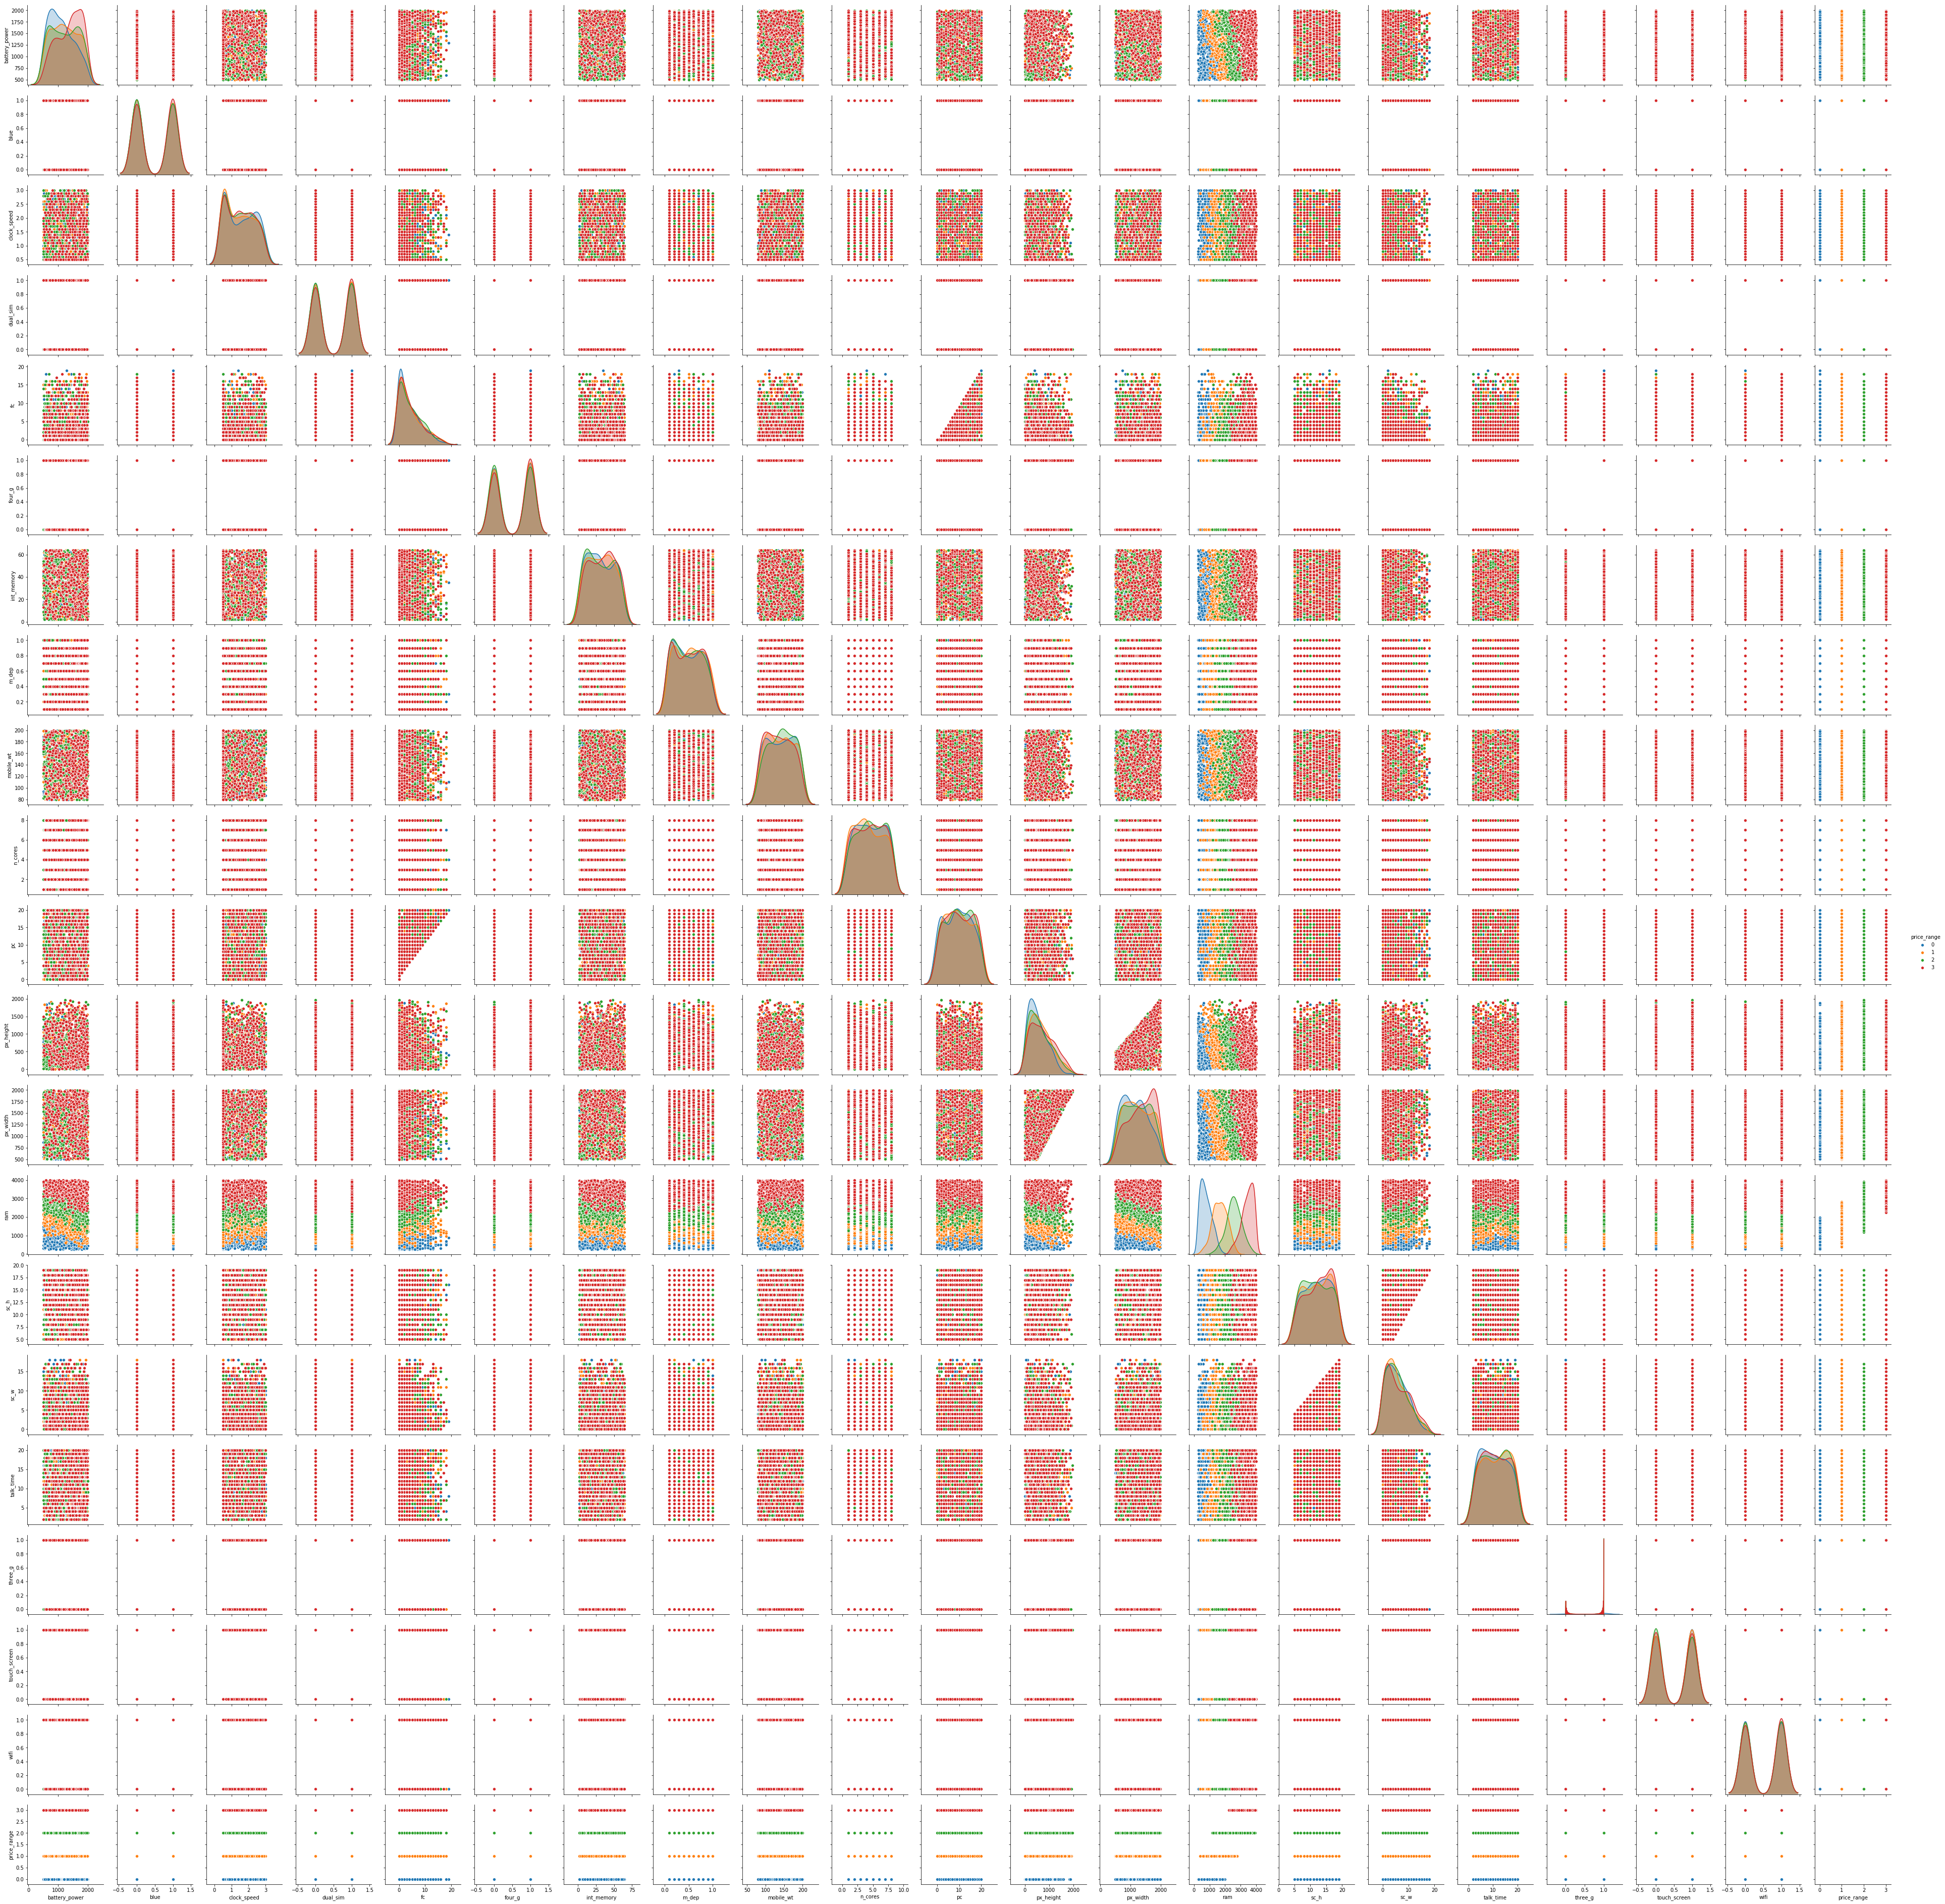

In [10]:
sns.pairplot(data,hue='price_range')


**How does RAM affected by price**


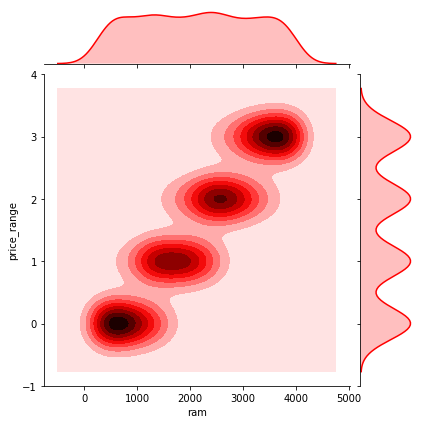

In [11]:
sns.jointplot(x='ram',y='price_range',data=data,color='red',kind='kde');


**Internal Memory vs Price Range**

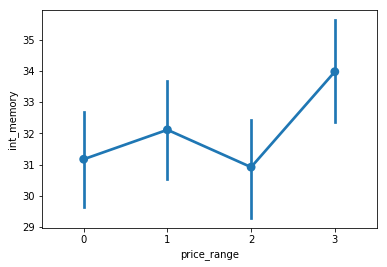

In [12]:
sns.pointplot(y="int_memory", x="price_range", data=data)


**% of Phones which support 3G**

In [0]:
labels = ["3G-supported",'Not supported']
values=data['three_g'].value_counts().values

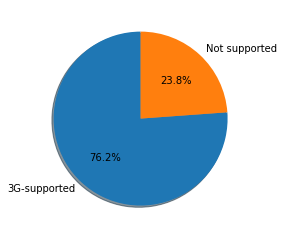

In [14]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

**% of Phones which support 4G**

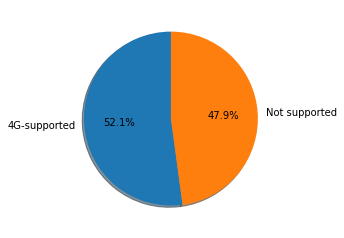

In [15]:
labels4g = ["4G-supported",'Not supported']
values4g = data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

**Battery power vs Price Range**

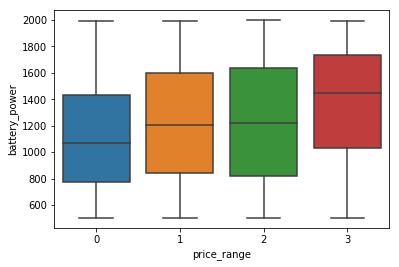

In [16]:
sns.boxplot(x="price_range", y="battery_power", data=data)


**No of Phones vs Camera megapixels of front and primary camera**

Text(0.5, 0, 'MegaPixels')

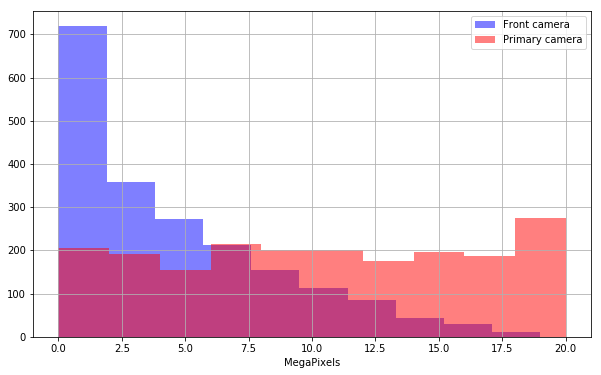

In [17]:
plt.figure(figsize=(10,6))
data['fc'].hist(alpha=0.5,color='blue',label='Front camera')
data['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

**Mobile Weght vs Price range**

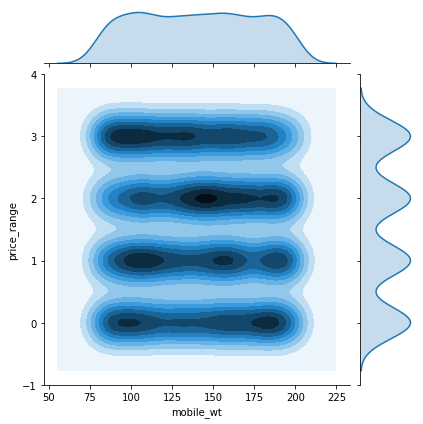

In [18]:
sns.jointplot(x='mobile_wt',y='price_range',data=data,kind='kde');


**Talk time vs Price range**

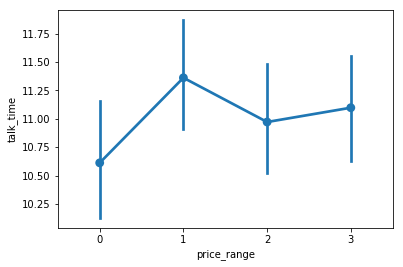

In [19]:
sns.pointplot(y="talk_time", x="price_range", data=data)


In [0]:
X=data.drop('price_range',axis=1)


In [0]:
y=data['price_range']


**Splitting the data**

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)


# Linear Regression Model

In [0]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

In [25]:
model_lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict_lr=model_lr.predict(X_test)

In [28]:
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics
from scipy import stats

r2_score(y_test, predict_lr)

0.9132801488185277